In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv("C:\\Users\\G Varun\\PycharmProjects\\pythonProject\\FinanceForecaster\\data\\HDFC.csv", parse_dates=['Date'], index_col='Date')

In [3]:
df = df.asfreq('B')  # Ensures it's in Business Days (B)
df = df.fillna(method='ffill')  # Fill missing values if any

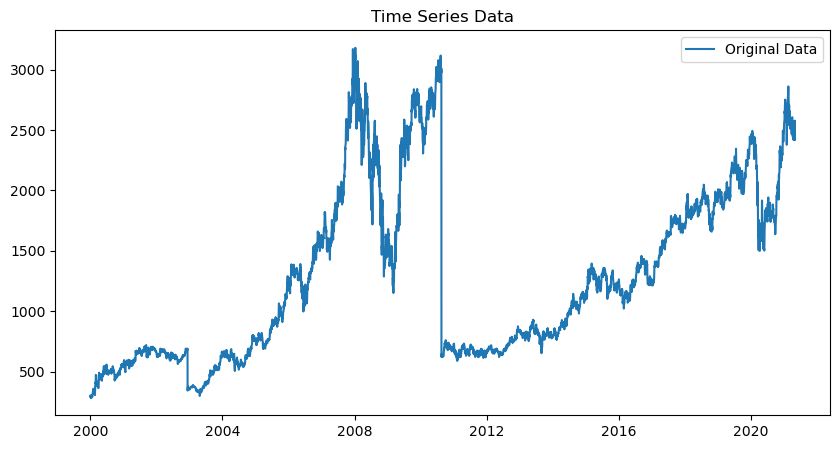

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label="Original Data")
plt.title("Time Series Data")
plt.legend()
plt.show()

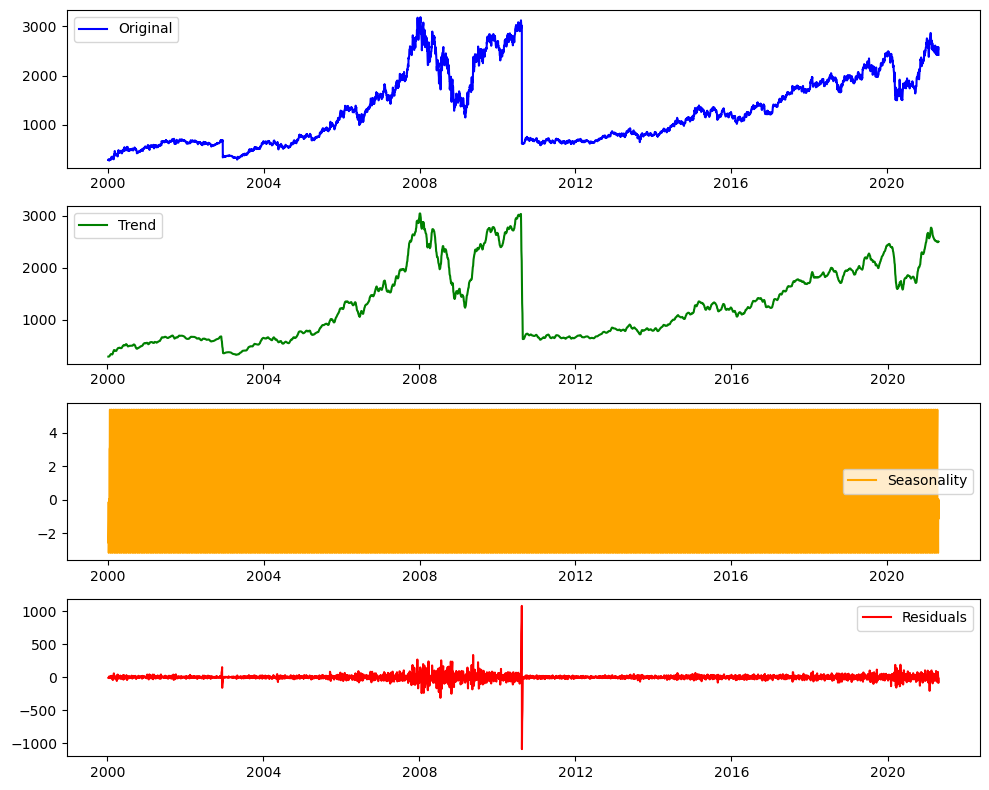

In [8]:
# Decomposing the time series
decomposition = seasonal_decompose(df['Close'], model='additive', period=12)  # Adjust period if needed

# Plot the decomposition
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['Close'], label="Original", color='blue')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label="Trend", color='green')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonality", color='orange')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label="Residuals", color='red')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


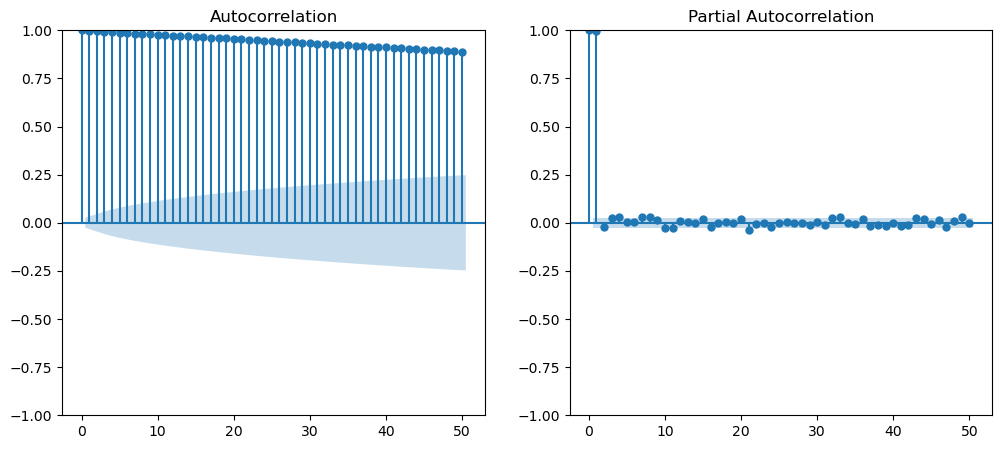

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(df['Close'], lags=50, ax=plt.gca())  # Check autocorrelation
plt.subplot(1,2,2)
plot_pacf(df['Close'], lags=50, ax=plt.gca())  # Check partial autocorrelation
plt.show()


In [ ]:
p, d, q = 1, 1, 1  # Adjust these based on ACF/PACF plots
P, D, Q, s = 1, 1, 1, 252  # Seasonal component with yearly seasonality
sarima_model = SARIMAX(df['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))